# Approximate the sine function with a polynomial of degree 3

In this notebook, we will be gradually moving up in the abstraction ladder:
- 1. Bare Numpy (You need to compute the gradient by hand)
- 2. Autograd (Here you do not need to compute the gradient by hand anymore)
- 3. torch.nn (Using the nn Abstraction in pytorch)
- 4. Optimizer Abstraction (Finally, we don't even need to iterate on the parameters to update them)

Here is the solution if you have some difficulties: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## Tensors
### Warm-up: numpy
Before introducing PyTorch, we will first implement the network using numpy.

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:

If you are not familiar with numpy, you can read this cheat sheet: https://www.datacamp.com/cheat-sheet/numpy-cheat-sheet-data-analysis-in-python

In [1]:
import matplotlib.pyplot as plt

def plot(y_pred, y, x):
    plt.plot(x, y, label='y (actual)')
    plt.plot(x, y_pred, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [2]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x**2 + d * x**3

    # Computing the loss is not necessary in numpy
    # But it will be necessary in Pytorch
    loss = np.mean((y - y_pred)**2)
    if t % 100 == 99:
        print(t, loss)

    # compute the gradients of the loss (mean squared error loss) wrt a, b, c, d
    # Here we calculate the difference for each point and then calculate a gradient for each point.
    # Take a pen and paper!
    # Warning: y_pred is a vector, and grad_a should be the mean gradient of each component of y_pred.
    grad_a = np.mean(2 * (y_pred - y))
    grad_b = np.mean(2 * (y_pred - y) * x)
    grad_c = np.mean(2 * (y_pred - y) * x**2)
    grad_d = np.mean(2 * (y_pred - y) * x**3)

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
# Tip: If it does not work, try to use .mean() instead of .sum()

99 0.739677371282691
199 0.6069211345436095
299 0.5084718070282426
399 0.42617756879865426
499 0.3573726408034121
599 0.2998361452889134
699 0.25171461650796373
799 0.21146089898401563
899 0.1777832649265797
999 0.14960303073201084
1099 0.1260192445982756
1199 0.10627925868276086
1299 0.08975419956226086
1399 0.07591851704745912
1499 0.06433292948121058
1599 0.05463019832951946
1699 0.04650326014662784
1799 0.03969532316645174
1899 0.03399160158038958
1999 0.029212415276122165
Result: y = 0.2240764537399687 + 0.7888294792637482 x + -0.03865691691842926 x^2 + -0.08367058891598025 x^3


Interpret the results. If the results are correct, move on to the next exercise.

Note:
- in the correction, they use a learning_rate = 1e-6 and then sum the gradients.
- Here we use a learning_rate = 1e-3 and then average the gradients.


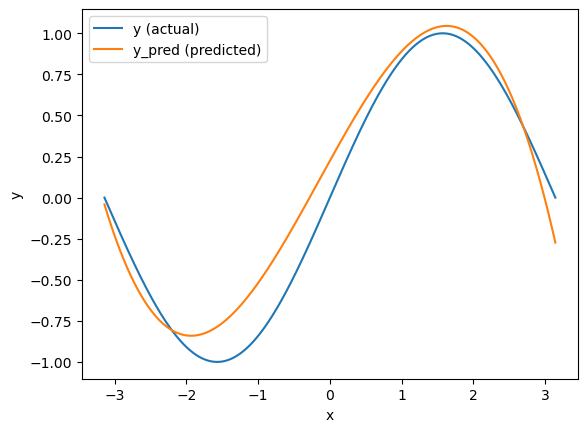

In [3]:
# Check with the plot!
plot(y_pred, y, x)

### PyTorch: Tensors
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the Tensor. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.

Here we use PyTorch Tensors to fit a third order polynomial to sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network:

You can check the pytorch cheat sheet to get back into the swing of things: https://pytorch.org/tutorials/beginner/ptcheat.html

In [4]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-3
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x**2 + d * x**3

    # Compute and print loss
    loss = torch.mean(2 * (y_pred - y)**2)
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_a = torch.mean(2 * (y_pred - y))
    grad_b = torch.mean(2 * (y_pred - y) * x)
    grad_c = torch.mean(2 * (y_pred - y) * x**2)
    grad_d = torch.mean(2 * (y_pred - y) * x**3)

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 tensor(1.7671)
199 tensor(1.4394)
299 tensor(1.1731)
399 tensor(0.9564)
499 tensor(0.7800)
599 tensor(0.6365)
699 tensor(0.5197)
799 tensor(0.4246)
899 tensor(0.3473)
999 tensor(0.2843)
1099 tensor(0.2331)
1199 tensor(0.1914)
1299 tensor(0.1574)
1399 tensor(0.1298)
1499 tensor(0.1073)
1599 tensor(0.0890)
1699 tensor(0.0741)
1799 tensor(0.0620)
1899 tensor(0.0521)
1999 tensor(0.0441)
Result: y = 0.0385485477745533 + 0.6775082349777222 x + -0.00665026530623436 x^2 + -0.06783611327409744 x^3


## Autograd
### PyTorch: Tensors and autograd
In the above examples, we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks.

Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

99 1.4699522256851196
199 1.2113457918167114
299 0.9989338517189026
399 0.8241289258003235
499 0.680234968662262
599 0.561754584312439
699 0.4641735851764679
799 0.3837835490703583
899 0.31753793358802795
999 0.26293304562568665
1099 0.21791104972362518
1199 0.18077991902828217
1299 0.15014806389808655
1399 0.1248706579208374
1499 0.10400614142417908
1599 0.08677893877029419
1699 0.07255107164382935
1799 0.060796961188316345
1899 0.051083777099847794
1999 0.043054789304733276
Result: y = 0.2151729315519333 + 0.6720074415206909 x + -0.03712090104818344 x^2 + -0.06705367565155029 x^3


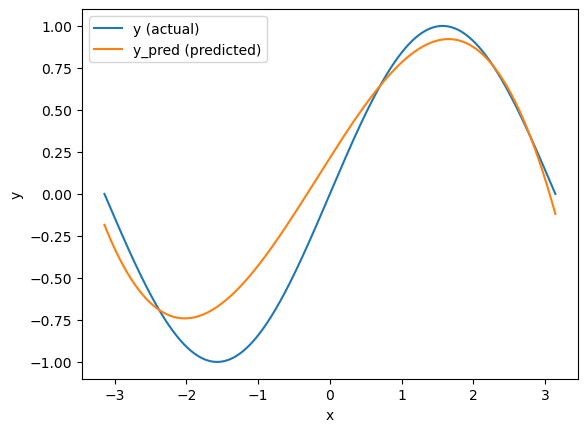

In [10]:
# Here You must use AUTOGRAD, ie, no need to calculate by hand the gradient.
import torch
import math

dtype = torch.float
device = torch.device("cuda")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):
    # Forward pass: compute predicted y using operations on Tensors. (same as above)
    y_pred = a + b * x + c * x**2 + d * x**3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = torch.mean((y - y_pred)**2)
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        # You can assign None or torch.zeros_like(a)
        a.grad = torch.zeros_like(a)
        b.grad = torch.zeros_like(b)
        c.grad = torch.zeros_like(c)
        d.grad = torch.zeros_like(d)

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
# TODO: Use the the plot function to check your results!
plot(y_pred.detach().cpu(), y.detach().cpu(), x.detach().cpu())

## nn module
### PyTorch: nn
Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In this example we use the nn package to implement our polynomial model network:

torch.Size([2000, 1])
torch.Size([3])
torch.Size([2000, 3])
99 0.370060533285141
199 0.30132734775543213
299 0.24589799344539642
399 0.20081686973571777
499 0.1641518473625183
599 0.13433174788951874
699 0.11007858067750931
799 0.0903531089425087
899 0.07430996000766754
999 0.06126159802079201
1099 0.05064918100833893
1199 0.042017918080091476
1299 0.03499782457947731
1399 0.029288247227668762
1499 0.024644402787089348
1599 0.020867394283413887
1699 0.01779540628194809
1799 0.01529686152935028
1899 0.013264676555991173
1999 0.011611813679337502
Result: y = 0.007871345616877079 + 0.7401675581932068 x + -0.0013579382793977857 x^2 + -0.07674885541200638 x^3


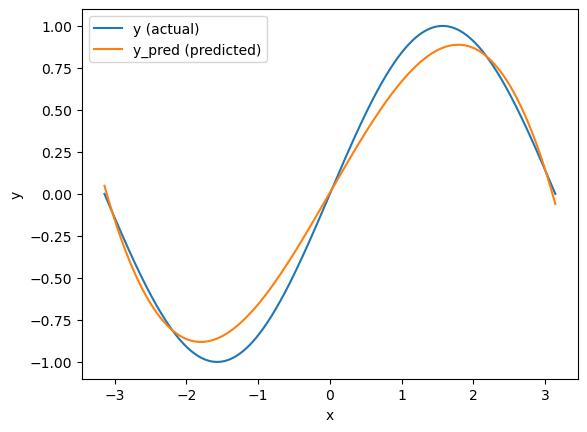

In [11]:
# Complete the ??? and the ...
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
print(x.unsqueeze(-1).shape)
print(p.shape)
print(xx.shape)

# In the above code,
# x.unsqueeze(-1) has shape [2000,1]
# p has shape [3],
# For this case, broadcasting semantics will apply to obtain a tensor
# xx of shape [2000,3]

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    # Important note: Linear contains a matrix that is always applied to the last dimension of a tensor.
    torch.nn.Linear(3, 1),
    # After the linear layer, the shape is [2000,1]
    # Note: Flatten default arguments are Flatten(start_dim = 1, end_dim = -1)
    # By default, start_dim = 1 because 0 corresponds to the batch dimension.
    # We use flatten because we want the final tensor to match the shape of y.
    torch.nn.Flatten(start_dim=0, end_dim=1)
    # After the flatten layer, the shape is [1]
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')


# TODO: Use the the plot function to check your results!
plot(y_pred.detach().numpy(), y.detach().numpy(), x.detach().numpy())

## PyTorch: optim
Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with torch.no_grad(). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the nn package to define our model as before, but we will optimize the model using the RMSprop algorithm provided by the optim package:

In [ ]:
# Adapt the Above code to use torch.optim.SGD
# You can read back the quick start https://pytorch.org/tutorials/beginner/basics/intro.html
...